In [35]:
import pandas as pd
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
response = requests.get(url, headers=headers)
html_content = response.text

tables = pd.read_html(html_content)
tesla_revenue_trimestral = tables[1]

selected_columns = tesla_revenue_trimestral[["Tesla Quarterly Revenue(Millions of US $)", "Tesla Quarterly Revenue(Millions of US $).1"]]

dataframe = selected_columns.rename(columns={"Tesla Quarterly Revenue(Millions of US $)": "DATE", "Tesla Quarterly Revenue(Millions of US $).1": "REVENUE"})

print(dataframe)




          DATE  REVENUE
0   2023-06-30  $24,927
1   2023-03-31  $23,329
2   2022-12-31  $24,318
3   2022-09-30  $21,454
4   2022-06-30  $16,934
5   2022-03-31  $18,756
6   2021-12-31  $17,719
7   2021-09-30  $13,757
8   2021-06-30  $11,958
9   2021-03-31  $10,389
10  2020-12-31  $10,744
11  2020-09-30   $8,771
12  2020-06-30   $6,036
13  2020-03-31   $5,985
14  2019-12-31   $7,384
15  2019-09-30   $6,303
16  2019-06-30   $6,350
17  2019-03-31   $4,541
18  2018-12-31   $7,226
19  2018-09-30   $6,824
20  2018-06-30   $4,002
21  2018-03-31   $3,409
22  2017-12-31   $3,288
23  2017-09-30   $2,985
24  2017-06-30   $2,790
25  2017-03-31   $2,696
26  2016-12-31   $2,285
27  2016-09-30   $2,298
28  2016-06-30   $1,270
29  2016-03-31   $1,147
30  2015-12-31   $1,214
31  2015-09-30     $937
32  2015-06-30     $955
33  2015-03-31     $940
34  2014-12-31     $957
35  2014-09-30     $852
36  2014-06-30     $769
37  2014-03-31     $621
38  2013-12-31     $615
39  2013-09-30     $431
40  2013-06-30  

In [36]:
# ELIMINAR VALORES VACIOS
dataframe = dataframe.dropna()
print(dataframe)


          DATE  REVENUE
0   2023-06-30  $24,927
1   2023-03-31  $23,329
2   2022-12-31  $24,318
3   2022-09-30  $21,454
4   2022-06-30  $16,934
5   2022-03-31  $18,756
6   2021-12-31  $17,719
7   2021-09-30  $13,757
8   2021-06-30  $11,958
9   2021-03-31  $10,389
10  2020-12-31  $10,744
11  2020-09-30   $8,771
12  2020-06-30   $6,036
13  2020-03-31   $5,985
14  2019-12-31   $7,384
15  2019-09-30   $6,303
16  2019-06-30   $6,350
17  2019-03-31   $4,541
18  2018-12-31   $7,226
19  2018-09-30   $6,824
20  2018-06-30   $4,002
21  2018-03-31   $3,409
22  2017-12-31   $3,288
23  2017-09-30   $2,985
24  2017-06-30   $2,790
25  2017-03-31   $2,696
26  2016-12-31   $2,285
27  2016-09-30   $2,298
28  2016-06-30   $1,270
29  2016-03-31   $1,147
30  2015-12-31   $1,214
31  2015-09-30     $937
32  2015-06-30     $955
33  2015-03-31     $940
34  2014-12-31     $957
35  2014-09-30     $852
36  2014-06-30     $769
37  2014-03-31     $621
38  2013-12-31     $615
39  2013-09-30     $431
40  2013-06-30  

In [42]:
# ELIMIAR VALORES $ Y ,
dataframe1= dataframe.replace('[\$,]', '', regex=True)

print(dataframe1)


          DATE REVENUE
0   2023-06-30   24927
1   2023-03-31   23329
2   2022-12-31   24318
3   2022-09-30   21454
4   2022-06-30   16934
5   2022-03-31   18756
6   2021-12-31   17719
7   2021-09-30   13757
8   2021-06-30   11958
9   2021-03-31   10389
10  2020-12-31   10744
11  2020-09-30    8771
12  2020-06-30    6036
13  2020-03-31    5985
14  2019-12-31    7384
15  2019-09-30    6303
16  2019-06-30    6350
17  2019-03-31    4541
18  2018-12-31    7226
19  2018-09-30    6824
20  2018-06-30    4002
21  2018-03-31    3409
22  2017-12-31    3288
23  2017-09-30    2985
24  2017-06-30    2790
25  2017-03-31    2696
26  2016-12-31    2285
27  2016-09-30    2298
28  2016-06-30    1270
29  2016-03-31    1147
30  2015-12-31    1214
31  2015-09-30     937
32  2015-06-30     955
33  2015-03-31     940
34  2014-12-31     957
35  2014-09-30     852
36  2014-06-30     769
37  2014-03-31     621
38  2013-12-31     615
39  2013-09-30     431
40  2013-06-30     405
41  2013-03-31     562
42  2012-12

In [45]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection


In [47]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE ingresos (Date, Revenue)""")

In [49]:
tesla_tuples = list(dataframe1.to_records(index = False))
tesla_tuples

[('2023-06-30', '24927'),
 ('2023-03-31', '23329'),
 ('2022-12-31', '24318'),
 ('2022-09-30', '21454'),
 ('2022-06-30', '16934'),
 ('2022-03-31', '18756'),
 ('2021-12-31', '17719'),
 ('2021-09-30', '13757'),
 ('2021-06-30', '11958'),
 ('2021-03-31', '10389'),
 ('2020-12-31', '10744'),
 ('2020-09-30', '8771'),
 ('2020-06-30', '6036'),
 ('2020-03-31', '5985'),
 ('2019-12-31', '7384'),
 ('2019-09-30', '6303'),
 ('2019-06-30', '6350'),
 ('2019-03-31', '4541'),
 ('2018-12-31', '7226'),
 ('2018-09-30', '6824'),
 ('2018-06-30', '4002'),
 ('2018-03-31', '3409'),
 ('2017-12-31', '3288'),
 ('2017-09-30', '2985'),
 ('2017-06-30', '2790'),
 ('2017-03-31', '2696'),
 ('2016-12-31', '2285'),
 ('2016-09-30', '2298'),
 ('2016-06-30', '1270'),
 ('2016-03-31', '1147'),
 ('2015-12-31', '1214'),
 ('2015-09-30', '937'),
 ('2015-06-30', '955'),
 ('2015-03-31', '940'),
 ('2014-12-31', '957'),
 ('2014-09-30', '852'),
 ('2014-06-30', '769'),
 ('2014-03-31', '621'),
 ('2013-12-31', '615'),
 ('2013-09-30', '431')

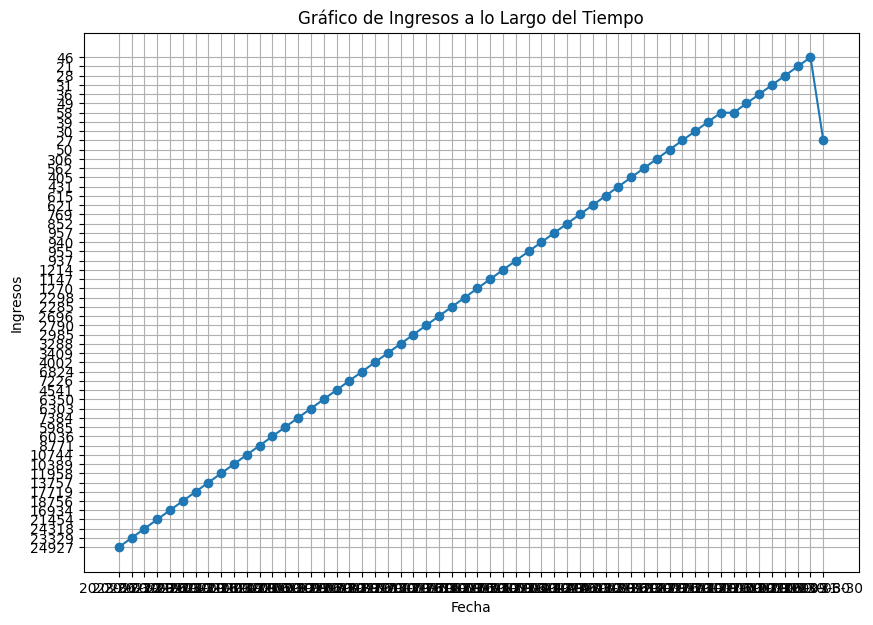

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(dataframe1['DATE'], dataframe1['REVENUE'], marker='o', linestyle='-')
plt.title('Gráfico de Ingresos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

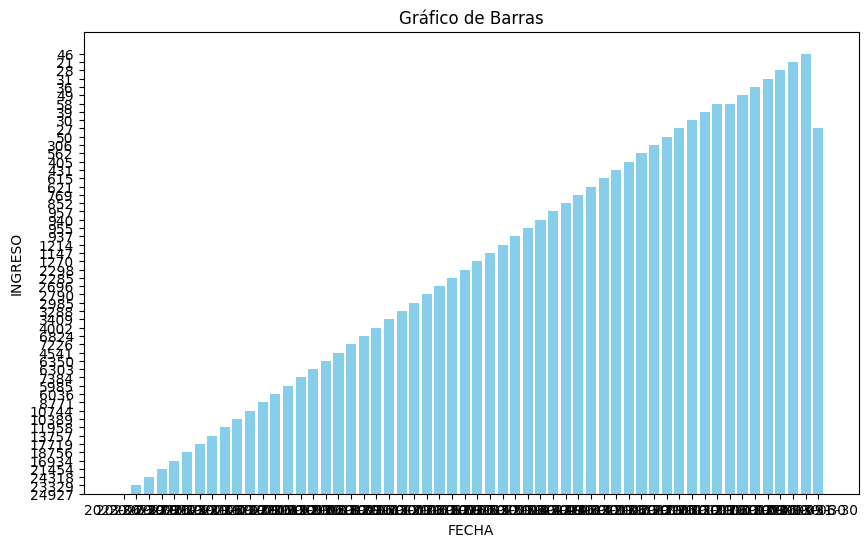

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(dataframe1['DATE'], dataframe1['REVENUE'], color='skyblue')
plt.title('Gráfico de Barras')
plt.xlabel('FECHA')
plt.ylabel('INGRESO')
plt.show()

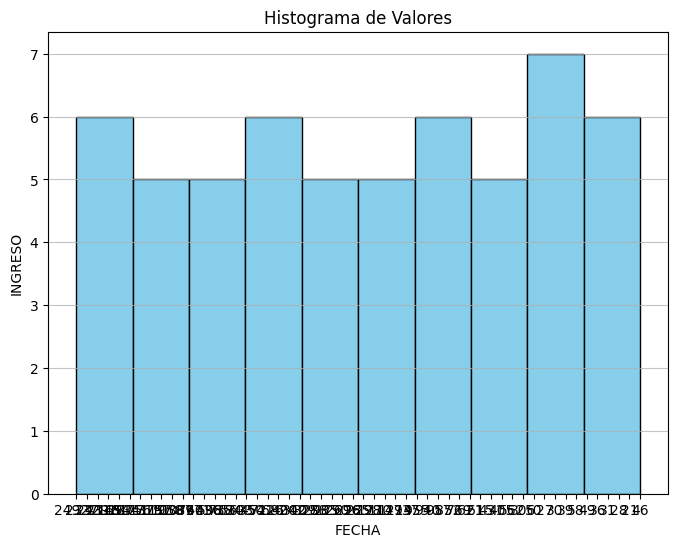

In [62]:

plt.figure(figsize=(8, 6))
plt.hist(dataframe1['REVENUE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.xlabel('FECHA')
plt.ylabel('INGRESO')
plt.grid(axis='y', alpha=0.75)
plt.show()
